In [3]:
import pandas as pd

df = pd.read_csv('flavors_of_cacao.csv')
  # Adjust path as needed
df.head()


,Company \r\n(Maker-if known),Specific Bean Origin\r\nor Bar Name,REF,Review\r\nDate,Cocoa\r\nPercent,Company\r\nLocation,Rating,Bean\r\nType,Broad Bean\r\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [4]:
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


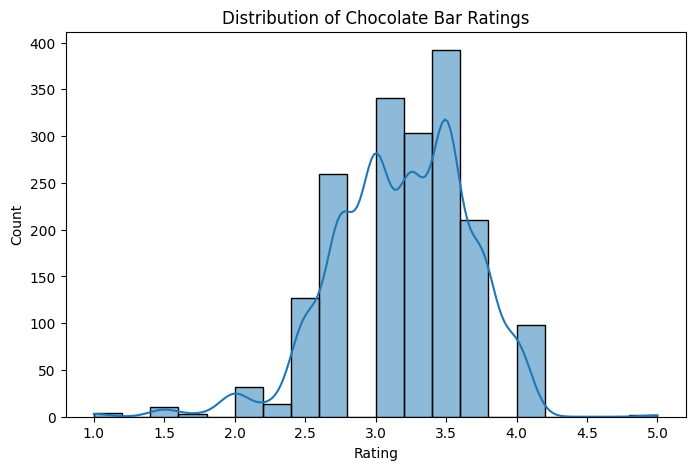

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title("Distribution of Chocolate Bar Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

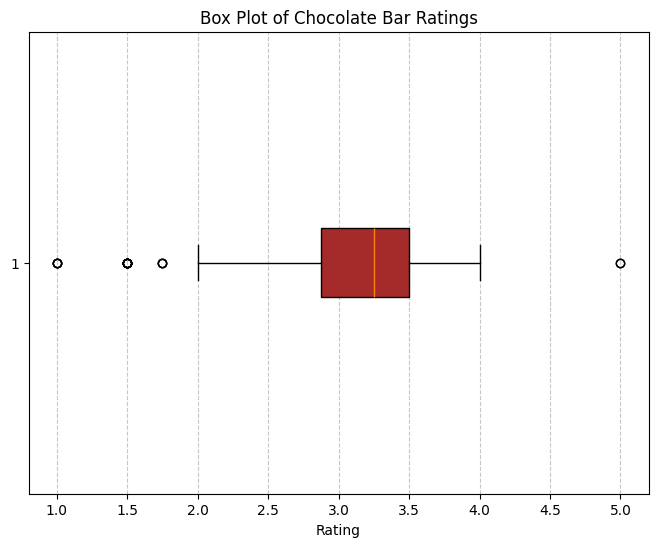

In [6]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Rating'], vert=False, patch_artist=True, boxprops=dict(facecolor='brown', color='black'))
plt.title('Box Plot of Chocolate Bar Ratings')
plt.xlabel('Rating')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [17]:
# First, clean the column name if needed
df.columns = df.columns.str.replace('\n', ' ').str.replace('\r', '', regex=False).str.strip()

# Then rename for convenience (optional)
df.rename(columns={'Cocoa Percent': 'Cocoa_Percent'}, inplace=True)

# Now remove the "%" sign and convert to float
df['Cocoa_Percent'] = df['Cocoa_Percent'].str.replace('%', '').astype(float)

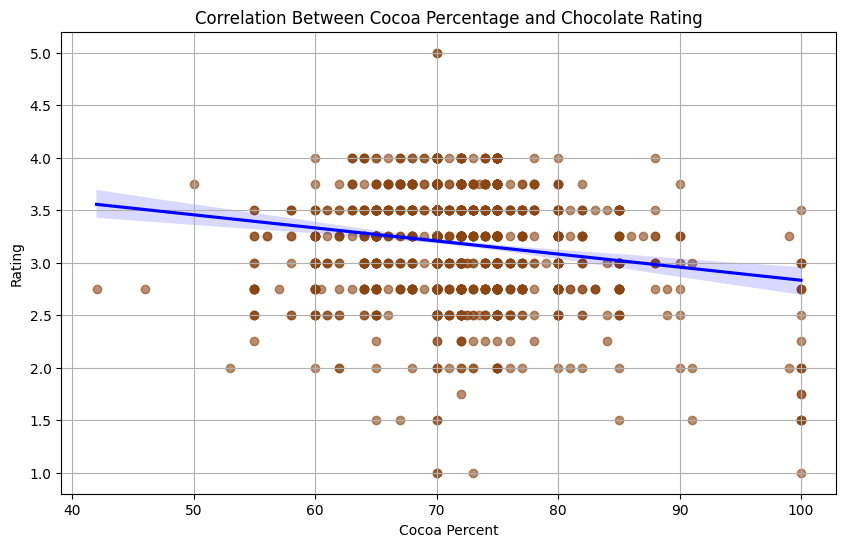

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean up the column names (you're doing this already)
df.columns = df.columns.str.replace('\n', ' ').str.strip()

# Some CSVs have weird carriage return characters like '\r'
df.columns = df.columns.str.replace('\r', '', regex=False)

# Optional: rename for convenience
df.rename(columns={"Cocoa Percent": "Cocoa_Percent"}, inplace=True)

# Plot with Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x='Cocoa_Percent',
    y='Rating',
    scatter_kws={'color': 'saddlebrown', 'alpha': 0.6},
    line_kws={'color': 'blue'},
)

plt.title('Correlation Between Cocoa Percentage and Chocolate Rating')
plt.xlabel('Cocoa Percent')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

In [ ]:
#COLUMN NAMES!!!!!!!!!!!!!!!!!
print(df.columns)

Index(['Company  (Maker-if known)', 'Specific Bean Origin or Bar Name', 'REF',
       'Review Date', 'Cocoa_Percent', 'Company Location', 'Rating',
       'Bean Type', 'Broad Bean Origin'],
      dtype='object')


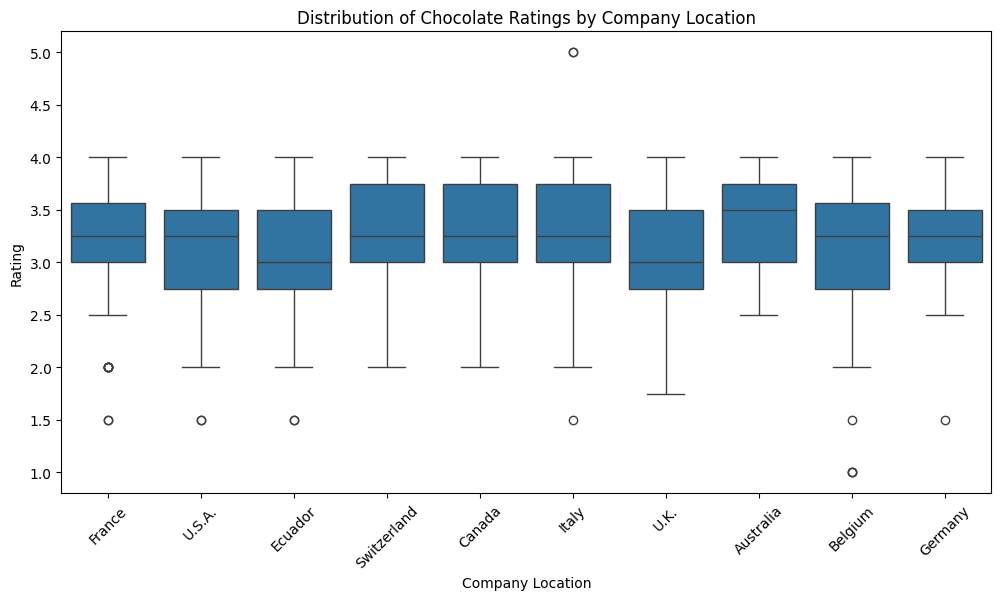

In [ ]:
# You can limit to the top 10 most common company locations
top_locations = df['Company\r Location'].value_counts().head(10).index
subset = df[df['Company\r Location'].isin(top_locations)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Company\r Location', y='Rating', data=subset)
plt.title("Distribution of Chocolate Ratings by Company Location")
plt.xlabel("Company Location")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.show()

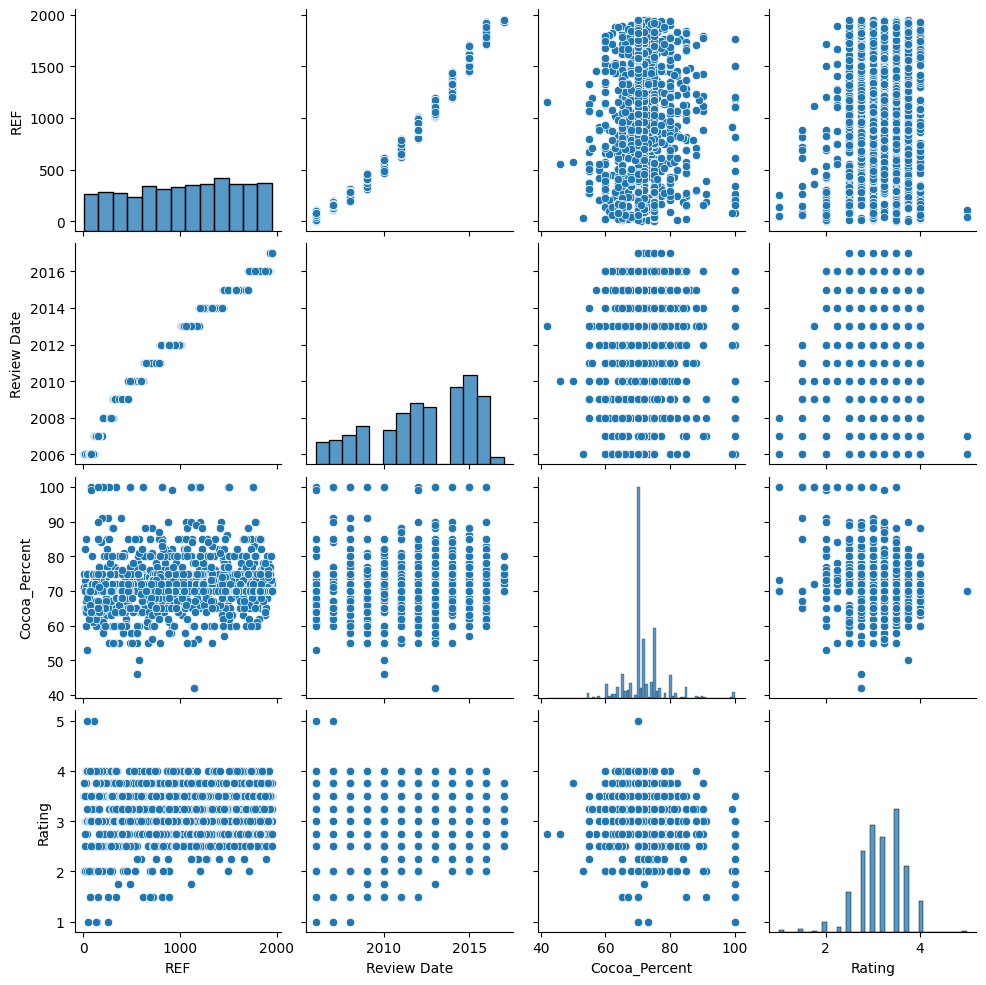

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# relationship between every variable of our matrix
# only works for numerical data
sns.pairplot(df)
plt.show()